In [2]:
import json
import random
import pandas as pd
from tqdm import tqdm
from web3 import Web3
import time
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt


In [23]:
#connecting to blockchain(Ganache)
web3 = Web3(Web3.HTTPProvider('HTTP://127.0.0.1:7545'))
print(web3.isConnected())

True


In [24]:
accounts_list = web3.eth.accounts
GRID_accounts = {}

#Making Dictionary
for i in range(1,len(accounts_list)):
    GRID_accounts['A'+str(i)] = accounts_list[i]
GRID_accounts

{'A1': '0x4508ec61E1594e46a541E3D17661dE0A38214701',
 'A2': '0xe64D7c915f6a358720D78e3e95C53a0f722fB5A9',
 'A3': '0xd7b4CF98d2d581B7e520d00768Bf36cf32b146f2',
 'A4': '0xdb1A39B1592Ea03C4854EB96D32aF12D2e9b9980'}

In [25]:
#latest block height
current_height = web3.eth.getBlock('latest').number
print(current_height)

6


# Plots

### 1. Amount of Gas Spent

#### 1.1. Deploying Contract

In [10]:
transaction_migrate_gasUsed = web3.eth.getBlock(1)['gasUsed']
transaction_firstContract_gasUsed = web3.eth.getBlock(3)['gasUsed']
transaction_secondContract_gasUsed = web3.eth.getBlock(5)['gasUsed']

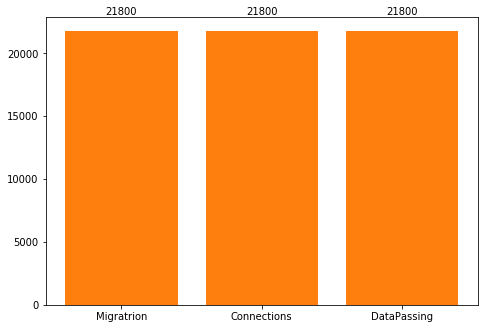

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_tick_label = ['Migratrion', 'Connections', 'DataPassing']
langs = ['Migratrion', 'Connections', 'DataPassing']
students = [transaction_migrate_gasUsed,transaction_firstContract_gasUsed,transaction_secondContract_gasUsed]
bar_plot = plt.bar(langs,students,tick_label=bar_tick_label)
bar_label = students

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)
        
autolabel(students)

ax.bar(langs,students)
plt.show()

#### 1.2. Making Transactions

In [12]:
gas_spent_A1 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A1'])]
gas_spent_A2 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A2'])]
gas_spent_A3 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A3'])]
gas_spent_A4 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A4'])]

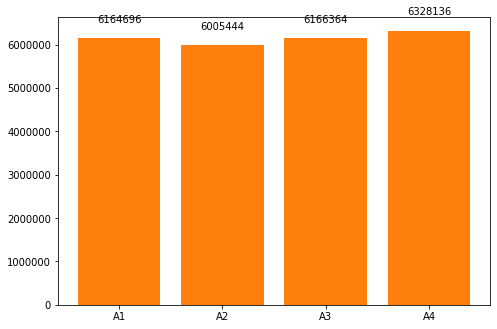

In [13]:
#plotting Total spending
gas_spent_A1_total = sum(gas_spent_A1)
gas_spent_A2_total = sum(gas_spent_A2)
gas_spent_A3_total = sum(gas_spent_A3)
gas_spent_A4_total = sum(gas_spent_A4)

total_gas_per_grid = [gas_spent_A1_total,gas_spent_A2_total,gas_spent_A3_total,gas_spent_A4_total]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_tick_label = ['A1', 'A2', 'A3', 'A4']
langs = ['A1', 'A2', 'A3', 'A4']
students = total_gas_per_grid
bar_plot = plt.bar(langs,students,tick_label=bar_tick_label)
bar_label = students

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)
        
autolabel(students)

ax.bar(langs,students)
plt.show()

In [14]:
gas_spent_A1_per_tx = [(gas_spent_A1[i] + gas_spent_A1[i+1]) for i in range(0,len(gas_spent_A1),2)]
gas_spent_A2_per_tx = [(gas_spent_A2[i] + gas_spent_A2[i+1]) for i in range(0,len(gas_spent_A2),2)]
gas_spent_A3_per_tx = [(gas_spent_A3[i] + gas_spent_A3[i+1]) for i in range(0,len(gas_spent_A3),2)]
gas_spent_A4_per_tx = [(gas_spent_A4[i] + gas_spent_A4[i+1]) for i in range(0,len(gas_spent_A4),2)]

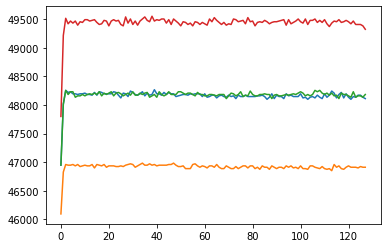

In [15]:
#plot of gas spent per transaction
first = gas_spent_A1_per_tx
second = gas_spent_A2_per_tx
third = gas_spent_A3_per_tx
fourth = gas_spent_A4_per_tx


plt.plot(first)
plt.plot(second)
plt.plot(third)
plt.plot(fourth)
plt.show()

In [16]:
gas_spent_A1_per_tx
#curve because there is little gas spent

[46948,
 48016,
 48256,
 48220,
 48232,
 48196,
 48196,
 48184,
 48196,
 48196,
 48208,
 48184,
 48184,
 48172,
 48220,
 48172,
 48232,
 48220,
 48196,
 48196,
 48196,
 48196,
 48232,
 48220,
 48172,
 48124,
 48208,
 48196,
 48148,
 48244,
 48220,
 48184,
 48172,
 48196,
 48232,
 48160,
 48208,
 48172,
 48184,
 48268,
 48196,
 48196,
 48172,
 48220,
 48184,
 48220,
 48196,
 48196,
 48148,
 48160,
 48172,
 48184,
 48184,
 48172,
 48196,
 48184,
 48196,
 48196,
 48196,
 48148,
 48196,
 48136,
 48148,
 48172,
 48172,
 48124,
 48160,
 48172,
 48148,
 48136,
 48172,
 48148,
 48160,
 48112,
 48172,
 48148,
 48148,
 48172,
 48148,
 48148,
 48148,
 48148,
 48160,
 48160,
 48172,
 48148,
 48100,
 48136,
 48196,
 48112,
 48172,
 48148,
 48148,
 48112,
 48196,
 48160,
 48172,
 48148,
 48148,
 48148,
 48196,
 48124,
 48136,
 48100,
 48136,
 48148,
 48124,
 48172,
 48136,
 48112,
 48196,
 48136,
 48172,
 48244,
 48208,
 48124,
 48184,
 48220,
 48124,
 48196,
 48136,
 48100,
 48148,
 48136,
 48172,


### Mean and stdDiv plot

In [17]:

'''
These are two functions which will be used to establish/destablish connection between GRID,
based on this we will add/remove connection in GRID)connections e.g. A1-A2, A1-A3, etc.

And also it will be used to transact on the blockchain, which will record the connections and disconnections
'''

def establish_connection(from_,to_):
    #adding connections to GRID_connections set.
    try:
        GRID_connections.add(from_ +'-'+ to_)
        #Interacting with blockchain to transact (enableConnections).
        contract_MappingAddressConnection.functions.enableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Establihed"
    except :
        return "Connection Already Exists"
        #later try except Exception as error to read from response

def destablish_connection(from_,to_):
    #removing connections from GRID_connections set.

    try:
        GRID_connections.remove(from_ +'-'+ to_)
        #Interacting with blockchain to transact.
        contract_MappingAddressConnection.functions.disableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Destablished"
    except :
        return "No connection exists to disconnect"

def dataFrame_to_Dict(data):
    #data_dictionary = {}
    data_list = []
    for i,j in data.iteritems():
        dict_j = []
        for z in j:
            dict_j.append(str(z))
        #data_dictionary[str(i)] = dict_j
        data_list.append(dict_j)
    #return data_dictionary
    return data_list

def data_transaction(sender,receiver,iteration,amount):
        #print(sender,receiver,iteration,amount)
        try:
            contract_passingArbitraryArguments.functions.passingValues(sender,receiver,iteration,amount).transact({'from':sender})
            return "OKo!"
        except:
            return "No connection"

In [18]:
all_iteration_mean = []
all_iteration_std_div = []

In [19]:
#max_iteration = [0,1,7,15,31,63,127]
max_iteration_number = 127

In [20]:

#Establising Connections on blockchain

accounts_list = web3.eth.accounts

#from index 1 to index 4, they will represent each GRID, so mapping them to regions A1, A2, A3, A4 resp.
GRID_accounts = {}
GRID_connections = set()

#Making Dictionary
for i in range(1,len(accounts_list)):
    GRID_accounts['A'+str(i)] = accounts_list[i]

#First CONTRACT Deployment
with open('build/contracts/MappingAddressConnection.json') as f:
  first_migration = json.load(f)

first_migration_contract_address = first_migration['networks']['5777']['address']
first_migration_abi = first_migration['abi']
contract_MappingAddressConnection = web3.eth.contract(address=first_migration_contract_address, abi = first_migration_abi)

#Adding connections
establish_connection(GRID_accounts['A1'],GRID_accounts['A2'])
establish_connection(GRID_accounts['A1'],GRID_accounts['A3'])
establish_connection(GRID_accounts['A2'],GRID_accounts['A1'])
establish_connection(GRID_accounts['A2'],GRID_accounts['A4'])
establish_connection(GRID_accounts['A3'],GRID_accounts['A1'])
establish_connection(GRID_accounts['A3'],GRID_accounts['A4'])
establish_connection(GRID_accounts['A4'],GRID_accounts['A2'])
establish_connection(GRID_accounts['A4'],GRID_accounts['A3'])

A1_A2 = pd.read_csv('../Seperated_Excel_WD/A1_A2.csv', header=None)
A1_A3 = pd.read_csv('../Seperated_Excel_WD/A1_A3.csv', header=None)
A2_A1 = pd.read_csv('../Seperated_Excel_WD/A2_A1.csv', header=None)
A2_A4 = pd.read_csv('../Seperated_Excel_WD/A2_A4.csv', header=None)
A3_A1 = pd.read_csv('../Seperated_Excel_WD/A3_A1.csv', header=None)
A3_A4 = pd.read_csv('../Seperated_Excel_WD/A3_A4.csv', header=None)
A4_A2 = pd.read_csv('../Seperated_Excel_WD/A4_A2.csv', header=None)
A4_A3 = pd.read_csv('../Seperated_Excel_WD/A4_A3.csv', header=None)

#Importing CSV
#interating through data and putting in dictionary
data_A1_A2 = dataFrame_to_Dict(A1_A2)
data_A1_A3 = dataFrame_to_Dict(A1_A3)
data_A2_A1 = dataFrame_to_Dict(A2_A1)
data_A2_A4 = dataFrame_to_Dict(A2_A4)
data_A3_A1 = dataFrame_to_Dict(A3_A1)
data_A3_A4 = dataFrame_to_Dict(A3_A4)
data_A4_A2 = dataFrame_to_Dict(A4_A2)
data_A4_A3 = dataFrame_to_Dict(A4_A3)

#Data connection set:
GRID_Connections = {'A1_A2' : data_A1_A2,
                    'A1_A3' : data_A1_A3,
                    'A2_A1' : data_A2_A1,
                    'A2_A4' : data_A2_A4,
                    'A3_A1' : data_A3_A1,
                    'A3_A4' : data_A3_A4,
                    'A4_A2' : data_A4_A2,
                    'A4_A3' : data_A4_A3
                   }
#Second CONTRACT Deployment
with open('build/contracts/passingArbitraryArguments.json') as f:
  second_migration = json.load(f)

second_migration_contract_address = second_migration['networks']['5777']['address']
second_migration_abi = second_migration['abi']

contract_passingArbitraryArguments = web3.eth.contract(address=second_migration_contract_address, abi = second_migration_abi)

counter = 0
processing = True
max_iteration = 0
while processing and max_iteration != max_iteration_number+1:
    for key in GRID_Connections.keys():
        try:
            sender, receiver = key.split("_")
            payload = GRID_Connections[key][counter]

            #print(data_transaction(GRID_accounts[sender],GRID_accounts[receiver],counter,payload))
            data_transaction(GRID_accounts[sender],GRID_accounts[receiver],counter,payload)
#                 print(f'''
#                 sender  : {sender}
#                 receiver: {receiver}
#                 counter : {counter}
#                 payload : {payload}
#                 ''')
        except IndexError:
            processing = False
            break
    counter += 1
    max_iteration += 1

destablish_connection(GRID_accounts['A1'],GRID_accounts['A2'])
destablish_connection(GRID_accounts['A1'],GRID_accounts['A3'])
destablish_connection(GRID_accounts['A2'],GRID_accounts['A1'])
destablish_connection(GRID_accounts['A2'],GRID_accounts['A4'])
destablish_connection(GRID_accounts['A3'],GRID_accounts['A1'])
destablish_connection(GRID_accounts['A3'],GRID_accounts['A4'])
destablish_connection(GRID_accounts['A4'],GRID_accounts['A2'])
destablish_connection(GRID_accounts['A4'],GRID_accounts['A3'])

'Connection Destablished'

In [21]:
def time_calculation(from_,to_,iteration_number):
    #retruns time
    start_time = time.time()
    event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[from_],"to": accounts_list[to_],"iteration":iteration_number})
    event_filter.get_all_entries()
    end_time = time.time()
    return (end_time-start_time)
    #return event_filter.get_all_entries()

average_of_all_grid_iteration_time = []
y_max_list = []
y_min_list = []

#time to retrieve data (filtering:)
for i in range(max_iteration):
    print(i)
    
    iter_1 = time_calculation(1,2,i)
    #print(iter_1)
    average_of_all_grid_iteration_time.append(iter_1)
    
    iter_2 = time_calculation(1,3,i)
    #print(iter_2)
    average_of_all_grid_iteration_time.append(iter_2)
    
    iter_3 = time_calculation(2,1,i)
    #print(iter_3)
    average_of_all_grid_iteration_time.append(iter_3)
    
    iter_4 = time_calculation(2,4,i)
    #print(iter_4)
    average_of_all_grid_iteration_time.append(iter_4)
    
    iter_5 = time_calculation(3,1,i)
    #print(iter_5)
    average_of_all_grid_iteration_time.append(iter_5)
    
    iter_6 = time_calculation(3,4,i)
    #print(iter_6)
    average_of_all_grid_iteration_time.append(iter_6)
    
    iter_7 = time_calculation(4,2,i)
    #print(iter_7)
    average_of_all_grid_iteration_time.append(iter_7)
    
    iter_8 = time_calculation(4,3,i)
    #print(iter_8)
    average_of_all_grid_iteration_time.append(iter_8)
    #print()
    
average_time_of_iteration = np.mean(average_of_all_grid_iteration_time)
std_time = np.std(average_of_all_grid_iteration_time)

print("", average_time_of_iteration)
print(np.mean(average_of_all_grid_iteration_time))
print(std_time)

all_iteration_mean.append(average_time_of_iteration)
all_iteration_std_div.append(std_time)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=7545): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f840aa8d2d0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
print('all_iteration_mean',all_iteration_mean)
print('all_iteration_std_div',all_iteration_std_div)

In [4]:
all_iteration_mean =[0.021282613277435303, 0.037127673625946045, 0.0582527220249176, 0.09043256379663944, 0.15741457417607307, 0.2867204640060663, 0.47007624711841345]
all_iteration_std_div = [0.0047442737822862265, 0.008648289174547961, 0.012631670041776955, 0.02012652233981228, 0.021825744948844955, 0.02158548965095472, 0.04709999095178139]

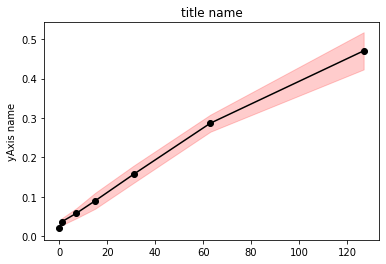

In [9]:
y_axis = np.array(all_iteration_mean)
# x_axis = np.array([0,1,7,15,31,63,127])
plt.plot(x_axis,y_axis,'o-',color='Black')
plt.fill_between(x_axis, y_axis - all_iteration_std_div , y_axis + all_iteration_std_div, color='red', alpha=0.2)
plt.title('title name')
plt.ylabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [185]:
event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[1],"to": accounts_list[2],"iteration":2})
print(event_filter.get_all_entries())

[AttributeDict({'args': AttributeDict({'_from': '0x9aD2B168758cC2b54FBE2D09065c63E1CD50c4CA', 'to': '0x430F64641A78E6eE11fd6dBAEF84137CB59C95a6', 'iteration': 2, 'amount': ['0.000153264985104455', '0.000153264985104455', '0.9945018013658761', '0.9945018013658761']}), 'event': 'NewTrade', 'logIndex': 0, 'transactionIndex': 0, 'transactionHash': HexBytes('0x3088c5104ed960a94f0be1047a3197e7a04563cca588715e87864152080f785b'), 'address': '0xdAEa05CFd300D3dc89cd4A240Cb8b4712CDdbcd2', 'blockHash': HexBytes('0x165c923bb69c8389c47311d57e93e571c74d1565110c0f48cc9f81e050415ab9'), 'blockNumber': 31})]


In [40]:
#Gas per payload(byte(s))
web3.eth.getBlock(36)

AttributeDict({'number': 36,
 'hash': HexBytes('0xcf54bacf774366a38960e0ae107000bccb31cb8c2a232edc03161a085acb5e8f'),
 'parentHash': HexBytes('0xe19bf50de1e109b9a276f4f0ae5ca37267f1a0e6b13712046f4b96e4784f2731'),
 'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x04000000000800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000080000000000000000000000004000000000000000000000000000000000000000000000000000000000008000000000004000000000000000000000000000000082000000000000000000000000000000000000000000000000000000000000000000000000100000000100000000000000000000000000000000000000400000000000000000000000000000000000000000000000000000000000020000000080000000000000000000000000000008000000000000008000000'),
 'transactionsRo

In [41]:
web3.eth.getTransaction('0x8f3f5dd540f4002ca57665a8a2549e9c058d4444dd21de1e00f7f1234600ef3f')

AttributeDict({'hash': HexBytes('0x8f3f5dd540f4002ca57665a8a2549e9c058d4444dd21de1e00f7f1234600ef3f'),
 'nonce': 5,
 'blockHash': HexBytes('0xcf54bacf774366a38960e0ae107000bccb31cb8c2a232edc03161a085acb5e8f'),
 'blockNumber': 36,
 'transactionIndex': 0,
 'from': '0xEF48A44525C6845C8512A930d0415B2340F7aDa5',
 'to': '0x04C7329c958D52D551288A2974b9D263bF73F090',
 'value': 0,
 'gas': 140958,
 'gasPrice': 20000000000,
 'input': '0x8ea4d95b000000000000000000000000ef48a44525c6845c8512a930d0415b2340f7ada50000000000000000000000002d9f45fa6352d1124a44643610ca6b4af15fff7a000000000000000000000000000000000000000000000000000000000000000200000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000004000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000c0000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000

In [36]:
print(len('000000000000000000000000cea6e4207f1b4c2d3ebd0ef0467cf2b1d249313c'))
print(len('0000000000000000000000003143794e308778f75dc64a57cd9932b1a8f80b12'))
print(len('0000000000000000000000000000000000000000000000000000000000000000'))

64
64
64


In [ ]:
#Data [0.000153264985104455,0.9945018013658761]
000000000000000000000000ef48a44525c6845c8512a930d0415b2340f7ada5 #
000000000000000000000000cea6e4207f1b4c2d3ebd0ef0467cf2b1d249313c #
0000000000000000000000000000000000000000000000000000000000000002 # iteration number 2
0000000000000000000000000000000000000000000000000000000000000080 # 0x80 mstore
0000000000000000000000000000000000000000000000000000000000000002 # Array/Payload Size
0000000000000000000000000000000000000000000000000000000000000040 # 
0000000000000000000000000000000000000000000000000000000000000080 # 0x80 mstore
0000000000000000000000000000000000000000000000000000000000000014 # Push 14
302e303030313533323634393835313034343535000000000000000000000000 # 0.000153264985104455
0000000000000000000000000000000000000000000000000000000000000012 # Push 12
302e393934353031383031333635383736310000000000000000000000000000 # 0.9945018013658761

In [39]:
000000000000000000000000ef48a44525c6845c8512a930d0415b2340f7ada5 #
0000000000000000000000002d9f45fa6352d1124a44643610ca6b4af15fff7a #
0000000000000000000000000000000000000000000000000000000000000002 # iteration number 2
0000000000000000000000000000000000000000000000000000000000000080 # 0x80 mstore 
0000000000000000000000000000000000000000000000000000000000000004 # Array/Payload Size
0000000000000000000000000000000000000000000000000000000000000080 # 0x80 mstore 
00000000000000000000000000000000000000000000000000000000000000c0 # 
0000000000000000000000000000000000000000000000000000000000000100 # 
0000000000000000000000000000000000000000000000000000000000000140 # 
0000000000000000000000000000000000000000000000000000000000000013 # Push 13
2d302e3032313939323739343533363439353500000000000000000000000000 # -0.0219927945364955
0000000000000000000000000000000000000000000000000000000000000014 # Push 14 
302e303030313533323634393835313034343535000000000000000000000000 # 0.000153264985104455
0000000000000000000000000000000000000000000000000000000000000012 # Push 12
312e303035343938313938363334313139380000000000000000000000000000 # 1.0054981986341198
0000000000000000000000000000000000000000000000000000000000000012 # Push 12
302e393934353031383031333635383736310000000000000000000000000000 # 0.9945018013658761

260

In [55]:
#Gas per payload(byte(s))
#A1-A2,A3-A4,A4-A2,A4-A3
Gas_payload_A1_A2 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A1'] and web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['to']==GRID_accounts['A2'])]
Gas_payload_A3_A4 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A3'] and web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['to']==GRID_accounts['A4'])]
Gas_payload_A4_A2_A3 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A4']]


In [56]:
print(len(Gas_payload_A1_A2))
print(len(Gas_payload_A3_A4))
print(len(Gas_payload_A4_A2_A3))

0
0
256


In [71]:
#Gas per payload(byte(s))
Gas_payload_A2 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A2'])]

In [59]:
Gas_payload_A1_A2 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A1'] & web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['to']==GRID_accounts['A2'])]

TypeError: unsupported operand type(s) for &: 'str' and 'NoneType'

In [64]:
web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A1'] and web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['to']==GRID_accounts['A2']

False

In [75]:
# Calculate the average
payload_4 = np.mean(Gas_payload_A4_A2_A3)
payload_2 = np.mean(Gas_payload_A2)

# Calculate the standard deviation
payload_4_std = np.std(Gas_payload_A4_A2_A3)
payload_2_std = np.std(Gas_payload_A2)

# Define labels, positions, bar heights and error bar heights
labels = ['Payload 4', 'P2']
x_pos = np.arange(len(labels))
CTEs = [payload_4,payload_2]
error = [payload_4_std,payload_2_std]


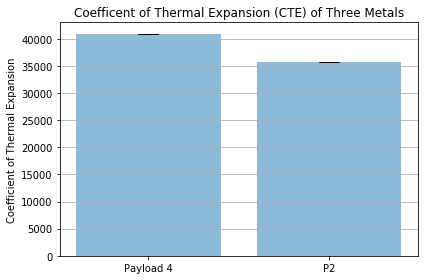

In [76]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('''Coefficient of Thermal Expansion''')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [74]:
len(Gas_payload_A2)

256

### Gas as a function of payload in bytes

In [127]:
from random import randint

def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end)

In [128]:
#2,4,8,16,32,64,128,256,512
bytes_size = [1,2,4,8,16,32,64,128,256]
payload_per_iteration = []

for i in bytes_size:
    
    payload_per_iteration.append(random_with_N_digits(i))
    
print(payload_per_iteration)

[8, 40, 8112, 99105977, 4253056139971704, 99995241553427925572672127674519, 7435552050388255737431809686453211359683941596830729307943390995, 55662194274887528804925324719748443742766642747722364349542835678448655558729791210490267085978306403391361674938193615082035948, 8470296444099435295224551567426772319704121786992327811455824051842332228214312081470661438874103454577335316838920815618793043295964720320762049319711414643945463020931301768695822285627392602433675515086279498638845615052125244424055232648461639525752169]


In [65]:
bytes_object = bytes.fromhex('302e393934353031383031333635383736310000000000000000000000000000')
ascii_string = bytes_object.decode("ASCII")
print(ascii_string)

0.9945018013658761              


In [66]:
#making transactions. A1_A2 with payload of size 1 with different byte size.
iteration = 2
sender = GRID_accounts['A1']
receiver = GRID_accounts['A2']

print(f'''
sender   : {sender}
receiver : {receiver}
iteration: {iteration}
''')


sender   : 0x6f91f03Dc4B568eA566091B8BE5504DB4538F5F6
receiver : 0x5A85d6f8Fd9AC8954A36FcD3Ef3DCbC16E036079
iteration: 2



In [67]:
#convert_to_bytes_object

In [68]:
#First CONTRACT Deployment
with open('build/contracts/MappingAddressConnection.json') as f:
  first_migration = json.load(f)

first_migration_contract_address = first_migration['networks']['5777']['address']
first_migration_abi = first_migration['abi']
contract_MappingAddressConnection = web3.eth.contract(address=first_migration_contract_address, abi = first_migration_abi)

#Second CONTRACT Deployment
with open('build/contracts/passingArbitraryArguments.json') as f:
  second_migration = json.load(f)


second_migration_contract_address = second_migration['networks']['5777']['address']
second_migration_abi = second_migration['abi']

contract_passingArbitraryArguments = web3.eth.contract(address=second_migration_contract_address, abi = second_migration_abi)


In [69]:
contract_MappingAddressConnection.functions.enableConnections(GRID_accounts['A1'],GRID_accounts['A2']).transact({'from':accounts_list[0]})

HexBytes('0xada87765f3fe16a3b83034ced2db24acef9881f3cc1c8f44de1ac4a5adc54d65')

In [70]:
contract_passingArbitraryArguments.functions.passingValues(sender,receiver,iteration,[]).transact({'from':sender})

HexBytes('0x427c94c361ad0c2d9ab9fc540536e81338ee2cbf91205f8a8447083c7793cdff')

In [71]:
#sending different transaction
for i in payload_per_iteration:
    contract_passingArbitraryArguments.functions.passingValues(sender,receiver,iteration,[str(i)]).transact({'from':sender})

In [129]:
current_height = web3.eth.getBlock('latest').number
print(current_height)
gas_for_byte_size = [web3.eth.getBlock(i)['gasUsed'] for i in range(8,current_height+1)]
print(gas_for_byte_size)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=7545): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fee8472cb90>: Failed to establish a new connection: [Errno 61] Connection refused'))

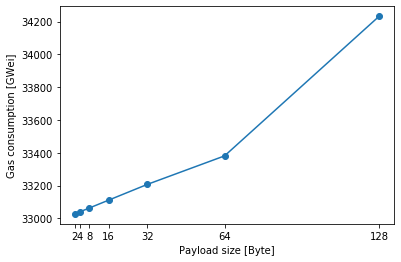

In [13]:
%matplotlib inline
#Plotting
#payload_per_iteration = [4, 56, 2855, 83990384, 6126539880576052, 95822573793874849557822803204914, 1363050368910455511621725195876362315647625456961278229531687355]
gas_for_byte_size = [30785, 33027, 33039, 33063, 33111, 33207, 33381, 34233]

#characters_size = [128,256,512]  #x axis
#plt.plot(characters_size,gas_for_byte_size[7:],'o-')
characters_size = [2,4,8,16,32,64,128]

f = plt.figure()
plt.plot(characters_size,gas_for_byte_size[1:8],'o-')
my_xticks = characters_size
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(my_xticks)
# plt.yticks(gas_for_byte_size[1:])
plt.ylabel('Gas consumption [GWei]')
plt.xlabel('Payload size [Byte]')
plt.show()

f.savefig("foo.pdf", bbox_inches='tight')

#Y axis: Gas consumption [GWei] #check and confirm
#X axis: Payload size [Byte]

### Bytes to Transfer

In [3]:
bytes_to_transfer = 1024
payload_size = [1,2,4,8,16,32,64]

#gas to transfer for each payload
gas_to_transfer = [int(bytes_to_transfer/i) for i in payload_size]
print(gas_to_transfer)

[1024, 512, 256, 128, 64, 32, 16]


In [4]:
tx_to_transfer = [a*b for a,b in zip(gas_to_transfer,gas_for_byte_size[1:])]
print(tx_to_transfer)

NameError: name 'gas_for_byte_size' is not defined

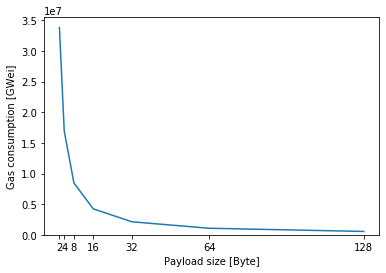

In [6]:

#Plotting

tx_to_transfer = [33819648, 16915968, 8464128, 4238208, 2125248, 1068192, 547728]
characters_size = [2,4,8,16,32,64,128]  #x axis
#characters_size = [1,2,3,4,5,6,7]  #x axis
f = plt.figure()

plt.plot(characters_size,tx_to_transfer,'-')
my_xticks = characters_size
plt.ylim(bottom = 0)
# plt.xscale('log')
# plt.set_xlabel(['12','22','23','12','22','23','2'])
plt.xticks(my_xticks,[2,4,8,16,32,64,128])
#plt.ylabel('Gas consumption to transfer 1024 bytes [GWei]')
plt.ylabel('Gas consumption [GWei]')
plt.xlabel('Payload size [Byte]')
plt.show()

f.savefig("plot_3.pdf", bbox_inches='tight')
#Remove Data value x axis
#Y axis: Gas consumption to transfer 1024 bytes [GWei] #check and confirm
#X axis: Payload size [Byte]